In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [37]:
## Importing Dataset
churn = pd.read_csv("/Users/nitibhuta/Desktop/Desktop/projects/customer churn (DM & ML)/Telco-Customer-Churn.csv")

In [38]:
## Data summary
## Revalidate the dataset and arranging them based on group types
churn.columns.to_series().groupby(churn.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [39]:
#summary of the churn dataframe
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
#statistical summary of the churn dataframe 
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [41]:
#getting unique values for every column
for i in churn.columns:
    print(i)
    print(f"{churn[i].unique()}")
    print(f"Count: {churn[i].nunique()}\n")

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Count: 7043

gender
['Female' 'Male']
Count: 2

SeniorCitizen
[0 1]
Count: 2

Partner
['Yes' 'No']
Count: 2

Dependents
['No' 'Yes']
Count: 2

tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Count: 73

PhoneService
['No' 'Yes']
Count: 2

MultipleLines
['No phone service' 'No' 'Yes']
Count: 3

InternetService
['DSL' 'Fiber optic' 'No']
Count: 3

OnlineSecurity
['No' 'Yes' 'No internet service']
Count: 3

OnlineBackup
['Yes' 'No' 'No internet service']
Count: 3

DeviceProtection
['No' 'Yes' 'No internet service']
Count: 3

TechSupport
['No' 'Yes' 'No internet service']
Count: 3

StreamingTV
['No' 'Yes' 'No internet service']
Count: 3

StreamingMovies
['No' 'Yes' 'No internet service']
Count: 3

Contract
['Month-to

In [42]:
## Saving custID to new table
custID = churn["customerID"]

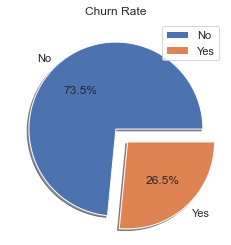

In [43]:
## Pie chart showing the distribution of churn rate
target = churn["Churn"].value_counts()
labels = ["No", "Yes"]

##Seaborn color palette
colors = sns.color_palette('bright')[0:5]

## Pie Plot
myexp = [0, 0.2]
plt.pie(target, labels = labels, autopct="%1.1f%%", shadow = True, explode = myexp)
plt.title('Churn Rate')
plt.legend()
plt.show()

In [ ]:
## Data preprocessing
## Converting the column TotalCharges to float
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
churn['TotalCharges'] = churn['TotalCharges'].astype("float")


## Filling null values with average values
missing_cols = churn.isna().any()
missing_cols = missing_cols[missing_cols == True].reset_index()
missing_cols = missing_cols["index"].tolist()
for col in churn.columns[1:]:
     if col in missing_cols:
        if churn[col].dtype != 'object':
             churn[col] =  churn[col].fillna(churn[col].mean()).round(0)

## Checking again for NA values
churn.isna().any()

## Using lable encoder to convert categorical variables to numerical variables

le = preprocessing.LabelEncoder()
## Label Encoding will be used for columns with 2 or less unique values (ie: Male/Female)
le_count = 0
for col in churn.columns[1:]:
    if churn[col].dtype == 'object':
        if len(list(churn[col].unique())) <= 2:
            le.fit(churn[col])
            churn[col] = le.transform(churn[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

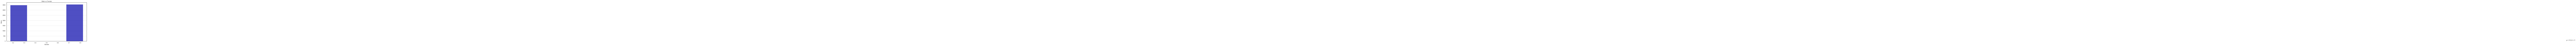

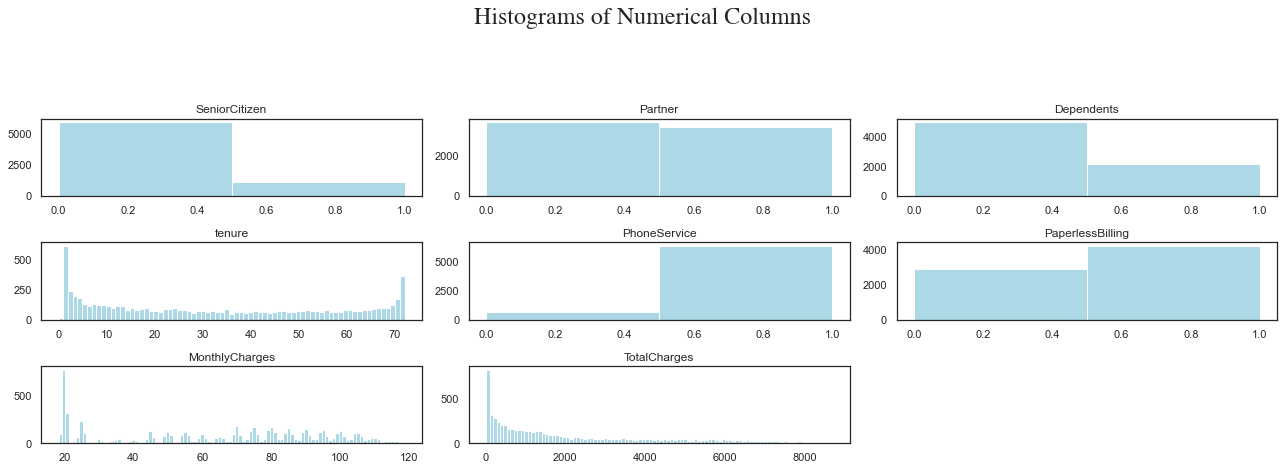

In [47]:
## Plotting Histogram

churn_gen = churn['gender']
fig = plt.figure(figsize=(12, 6))
0 == "Male"
1 == "Female"
values = ["Male", "Female"]
n, bins, patches = plt.hist(x=churn_gen, bins= 2, color='#0504aa',
                            alpha=0.7, rwidth=0.3)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Gender')
plt.ylabel('Value')
plt.title('Male vs Female')

plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()

## Creating Dataset for histogram
churn_hist = churn[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]

fig = plt.figure(figsize=(18, 12))
plt.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", fontstyle = "normal", fontsize = 24, fontfamily = "Times")
for i in range(churn_hist.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(churn_hist.columns.values[i])
    vals = np.size(churn_hist.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(churn_hist.iloc[:, i], bins=vals, color = 'lightblue')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

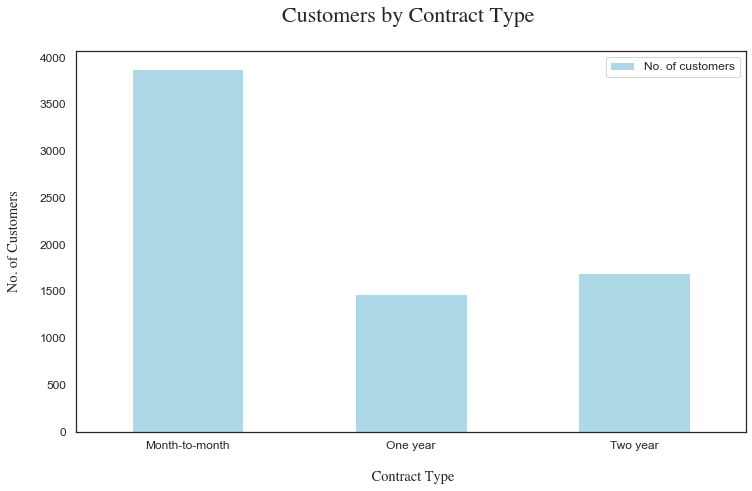

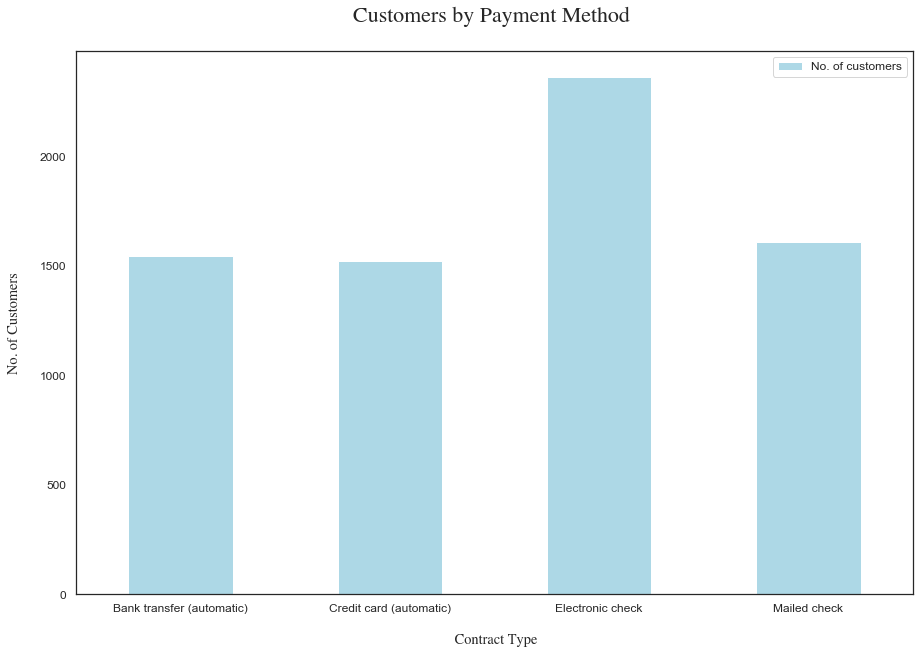

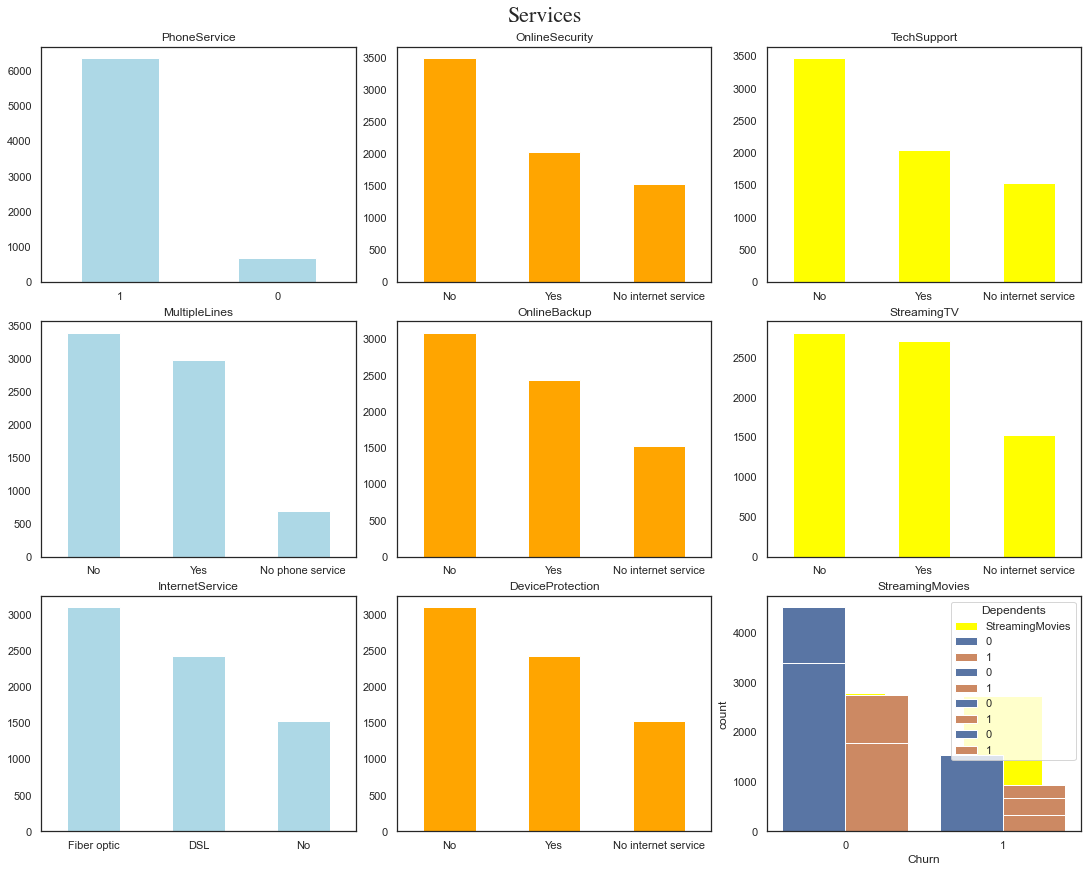

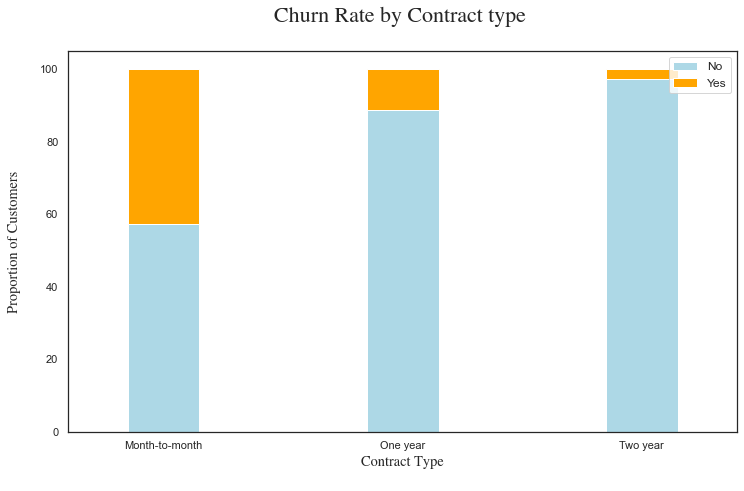

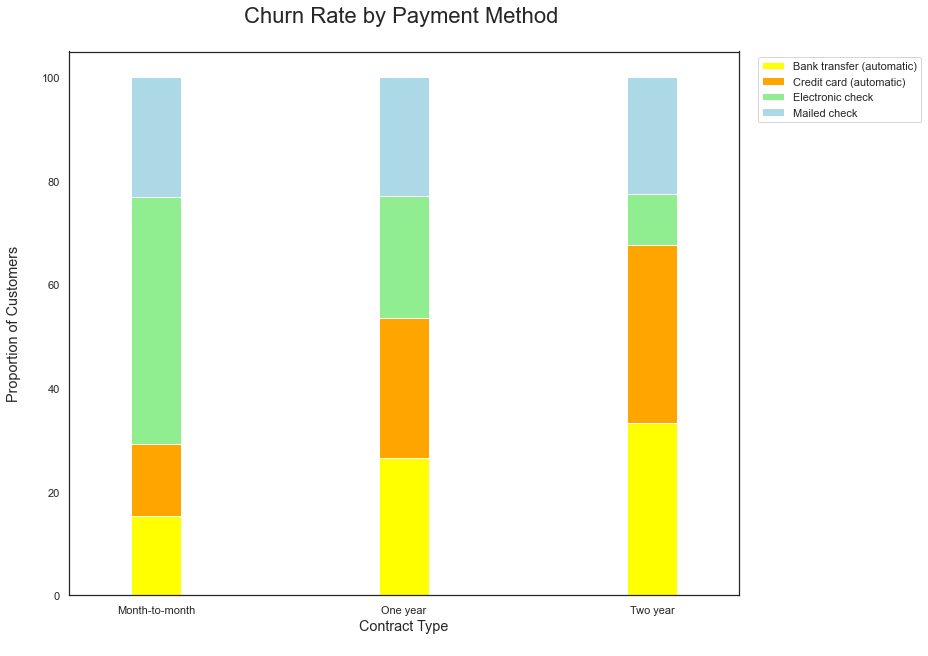

In [48]:
## Data Visulization (Bar Plots) 

## Creating bar plot for Customers by Contract 
## Grouping customerID with Contract and converting customerID to numeric
contract_split = churn[[ "customerID", "Contract"]]
sectors = contract_split.groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type',legend = True, table = False, grid = False, subplots = False, figsize =(12, 7), color ='lightblue', fontsize = 12, stacked=False)

plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "Times")

plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "Times")

plt.title('Customers by Contract Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "Times")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)


## Creating bar plot for Customers by Payment Methods
## Grouping customerID with Contract and converting customerID to numeric
payment_method_split = churn[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split  .groupby ("PaymentMethod")
payment_method_split  = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(columns={'customerID':'No. of customers'}, inplace=True)

ax =  payment_method_split[["No. of customers"]].plot.bar(title = 'Customers by Payment Method', legend =True, table = False, grid = False, subplots = False,  figsize =(15, 10), color ='lightblue', fontsize = 12, stacked=False)

plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "Times")

plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "Times")

plt.title('Customers by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "Times")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


## Bar plots for Total services offered
tos = ['PhoneService','MultipleLines',
'InternetService','OnlineSecurity',  'OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies']
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12), constrained_layout=True)
fig.suptitle('Services', fontsize = 22, horizontalalignment="center", fontstyle = "normal", fontfamily = "Times")
for i, item in enumerate(tos):
    if i < 3:
        ax = churn[item].value_counts().plot(
        kind = 'bar',ax=axes[i,0],
        rot = 0, color ='lightblue')
        ax.set_title(item)
        
    elif i >=3 and i < 6:
            ax = churn[item].value_counts().plot(
            kind = 'bar',ax=axes[i-3,1],
            rot = 0,color ='orange')
            ax.set_title(item)
        
    elif i < 9:
            ax = churn[item].value_counts().plot(
            kind = 'bar',ax=axes[i-6,2],rot = 0,
            color = 'yellow')
            ax.set_title(item)


## Barplot for churn rate based on gender
sns.countplot(x='Churn',data=churn,hue='gender')

## Barplot for churn rate based on SeniorCitizen
sns.countplot(x='Churn',data=churn,hue='SeniorCitizen')

## Barplot for churn rate based on Partner
sns.countplot(x='Churn',data=churn,hue='Partner')

## Barplot for churn rate based on Dependents
sns.countplot(x='Churn',data=churn,hue='Dependents')


## Creating bar plot for Contract by Churn Rate
contract_churn = churn.groupby(['Contract','Churn']).size().unstack()

contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)

colors  = ['lightblue','orange']

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "Times")

plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "Times")

plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "Times")

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")


## Creating bar plot for Payment Method by Churn Rate
contract_churn = churn.groupby(['Contract','PaymentMethod']).size().unstack()

contract_churn.rename(columns = {0:'No', 1:'Yes'}, inplace=True)
colors  = ['yellow','orange', 'lightgreen' , 'lightblue']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0,figsize = (12,10), color = colors)

plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")

plt.title('Churn Rate by Payment Method \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.legend(bbox_to_anchor= (1.02, 1))

Most Positive Correlations: 
 MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PhoneService        0.011942
dtype: float64

Most Negative Correlations: 
 gender         -0.008612
Partner        -0.150448
Dependents     -0.164221
TotalCharges   -0.199426
tenure         -0.352229
dtype: float64


/var/folders/bj/_4vxk8dj68d47j_pc9py9p900000gn/T/ipykernel_96549/567597988.py:27: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


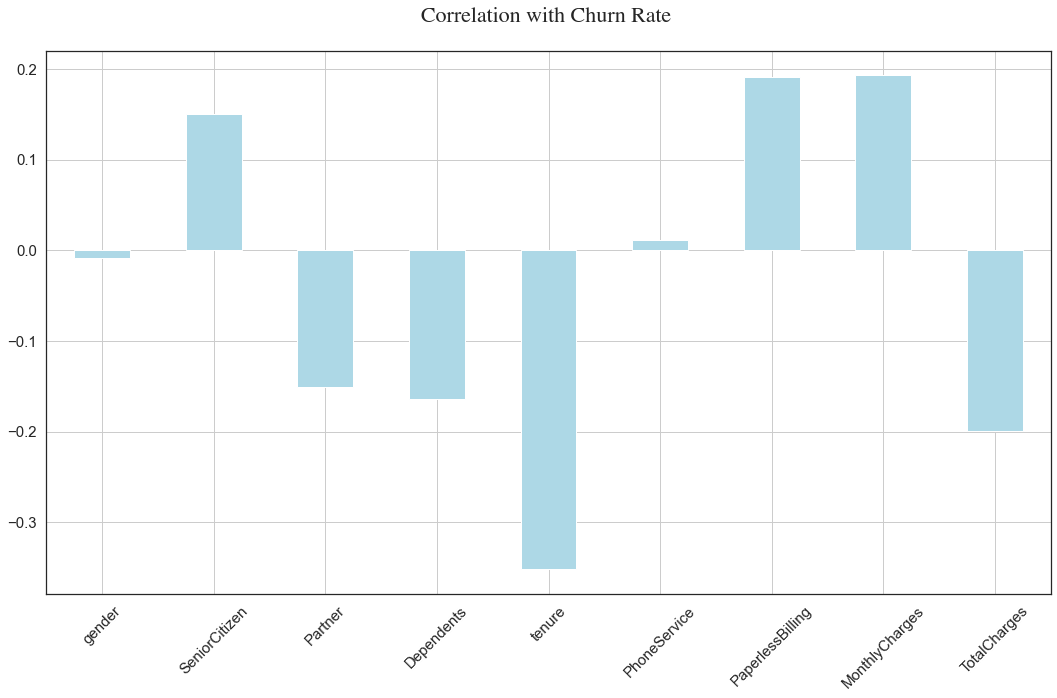

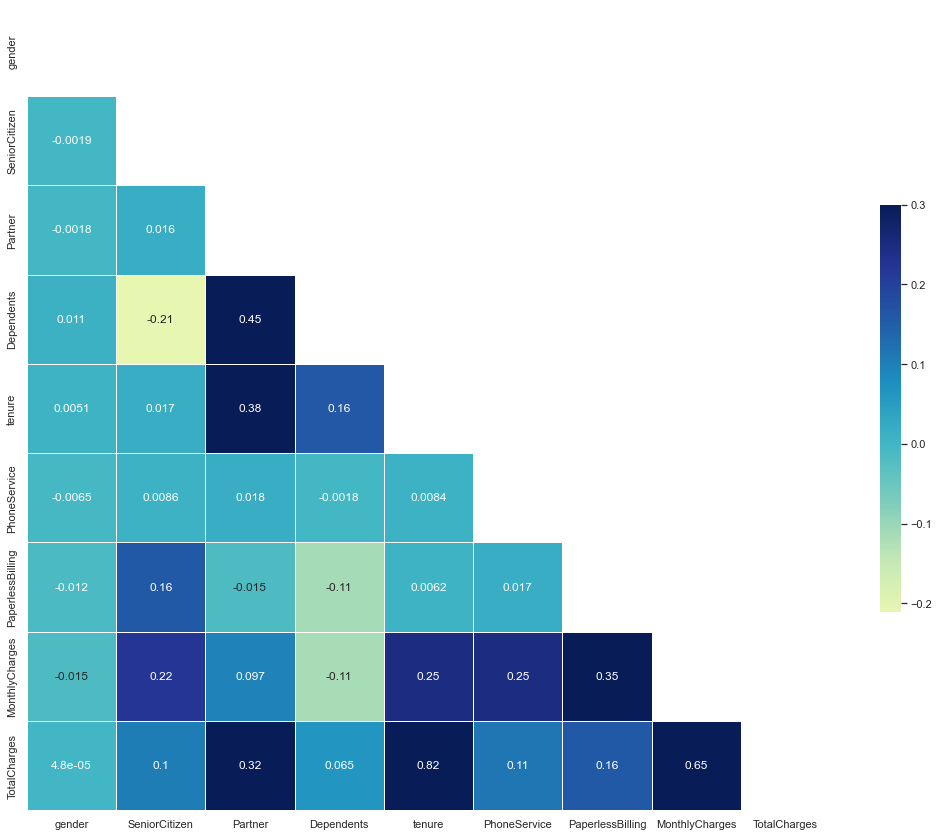

In [49]:
## Finding Correlation between variables
corr_churn = churn[['gender','SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']]
correlations = corr_churn.corrwith(churn.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)


## Plotting the correlation to find the corr between varibales and visualize it 
correlations = corr_churn.corrwith(churn.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'lightblue',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "Times")


## Creating heatmaps for correlation
sns.set(style="white")
corr = corr_churn.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
##Draw the heatmap
sns.heatmap(corr, mask=mask, annot = True, cmap="YlGnBu", vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})


## Getting Dummy columns for the dataset
churn = churn.drop(columns="customerID")
## Convert rest of categorical variable into dummy:
churn= pd.get_dummies(churn)


## Y is the dependent variable and X is everything else:
x = churn.drop(columns = 'Churn')
y = churn.loc[:, 'Churn']

In [ ]:
## Importing all the libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error


## Using train test split method to check the accuracies of models
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101, shuffle=True)


def create_models(seed=2):

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

## Create a list with all the algorithms we are going to assess
models = create_models()

## Finding the best Classifier
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    ## fit the model with the training data
    model.fit(x_train, y_train).predict(x_test)
    ## make predictions with the testing data
    predictions = model.predict(x_test)
    ## calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    ## append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    ## print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))


## Trying to fit the model in Logistic Regression as it has the accuracy of 0.8080
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
## Predicting the Test set results
y_pred = classifier.predict(x_test)
## Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.sort_values(["Precision", "Recall"], ascending = False)
print (results)

rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print("testing data rmse is:", rmse_test)

## k-Fold Cross Validation: Using this to reduce the variance in the data.
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Logistic Regression Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))
## Accuracy of the model is either 76% to 84%


## Confusion Matrix
cm = confusion_matrix(y_test, y_pred) 
churn_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))

## Plotting the CM
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(churn_cm, annot=True, fmt='g', cmap="YlGnBu" )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')



## ROC curve
classifier.fit(x_train, y_train) 
probs = classifier.predict_proba(x_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred)

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(x_test)[:,1])
plt.figure(figsize=(14, 6))

## Plot Logistic Regression ROC Curve
plt.plot(rf_fpr, rf_tpr, 
label='Logistic Regression (area = %0.2f)' % classifier_roc_auc)

## Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "20", 
fontfamily = "Times")

plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "20", 
fontfamily = "Times")

plt.title('ROC Graph \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "Times")

plt.set(facecolor = "white")

plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()

## Analyzing the coefficients to get the best features
feature_importances = pd.concat([pd.DataFrame(churn.columns, columns = ["features"]), pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])], axis = 1)
feature_importances.sort_values("coef", ascending = False)

feature_top10 = feature_importances.nlargest(15, 'coef')
sns.barplot(x= "coef", y = "features", data = feature_top10)

## Using hyperparameter tuning for improving the model

## Running regularization method for first time:
import time
penalty = ['l1', 'l2']

## Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

## Combining Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
lr_classifier  = lr_classifier .fit(x_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters    
    

## Running Regularization Method for second time 
import time
penalty = ['l2']
# Create regularization hyperparameter space
C = [ 0.0001, 0.001, 0.01, 0.02, 0.05]
# Combine Parameters
parameters = dict(C=C, penalty=penalty)
lr_classifier = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "balanced_accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
lr_classifier  = lr_classifier .fit(x_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))
lr_best_accuracy = lr_classifier.best_score_
lr_best_parameters = lr_classifier.best_params_
lr_best_accuracy, lr_best_parameters


## Running hyperparameter for final time
lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
lr_classifier.fit(x_train, y_train)

## Predict the Test set results
y_pred = lr_classifier.predict(x_test)

## Probability score
y_pred_probs = lr_classifier.predict_proba(x_test)
y_pred_probs  = y_pred_probs [:, 1]    


## Comparing training model to the testing model

cm = confusion_matrix(y_test, y_pred) 

## Confusion Matrix as Crosstab:
print (cm)
    
pd.crosstab(y_test,pd.Series(y_pred), rownames=['ACTUAL'],colnames=['PRED'])

## Visualize Confusion Matrix:
cm = confusion_matrix(y_test, y_pred) 

## Plotting the confusion matrix
df_churn_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_churn_cm, annot=True, fmt='g' , cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## Final Results
final_results = pd.concat([y_test], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results["propensity_to_churn(%)"] = y_pred_probs
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100
final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"].round(2)

final_results = final_results[['Churn', 'predictions', 'propensity_to_churn(%)']]
final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print (final_results)